In [11]:
import cv2
import os
from marker_detection import MarkerDetection
from localization import Localization
from goodrobotdetection import RobotDetection
from pipeline import PipeLine
import yaml
import matplotlib.pyplot as plt

In [4]:
%reload_ext autoreload
%autoreload 2

In [9]:
# frames = ["image.jpeg", "image2.jpeg", "image3.jpeg", "image4.jpeg", "image5.jpeg"]
# frames = ["image5.jpeg"]
frames = ["x_302_y_0.png", "x_302_y_445.png", "x_n301_y_0.png"]
frames = [
    "x_302_y_0.png",
    "x_302_y_445.png",
    "x_n301_y_0.png",
    "useful1.png",
    "useful2.jpg",
    "useful3.jpg",
    "useful4.jpg",
    "useful5.png",
    "useful6.png",
]
# frames = [
#     "38.jpg",
#     "39.jpg",
#     "40.jpg",
#     "41.jpg",
#     "42.jpg",
#     "43.jpg",
#     "44.jpg",
#     "45.jpg",
#     "46.jpg",
# ]
frames = [ "80.jpg"]


config_path = os.path.join("..", "..", "..", "configs", "lab2", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
m = MarkerDetection(config=config)
l = Localization(config=config)
p = PipeLine(config=config)
r = RobotDetection(config=config)

In [8]:
for f in frames:
    f_path = os.path.join("..", "..", "..", "assets", f)
    frame = cv2.imread(f_path)
    if frame is None:
        raise ValueError(f"Could not load image: {f_path}")

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # tmp = m.detect(frame)
    # location_exact = l.triangulate_exact(tmp)
    # location_3d_ls = l.triangulate_3d_ls(tmp)
    # location_2d_ls = l.triangulate_2d_ls(tmp)
    # print("------------------------------")
    # print(location_exact)
    # print(location_3d_ls)
    # print(location_2d_ls)
    # print(f)
    # print("------------------------------")
    cmd = p(rgb_frame)

ValueError: Could not load image: ..\..\..\assets\80.jpg

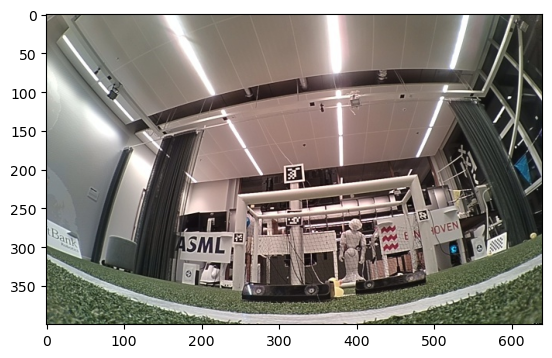

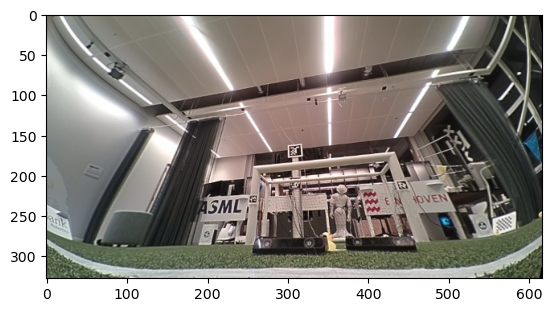

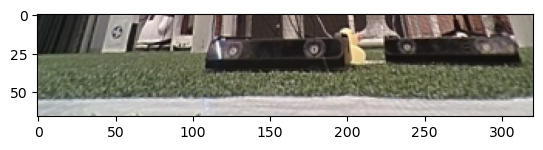

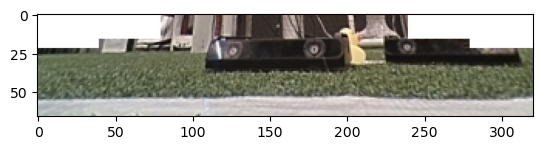

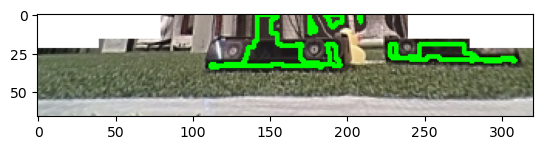

None


In [ ]:
frame = cv2.imread("img_30.jpg")
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.show()
frame = r._undistort_image(rgb_frame)
plt.imshow(frame)
plt.show()
frame = r.crop_image(frame, 0.48, 0.8)
plt.imshow(frame)
plt.show()
frame = r.white_image(frame)
plt.imshow(frame)
plt.show()
contours = r.find_black_objects(frame)
img_w_contours = r.draw_contours(frame, contours)
plt.imshow(img_w_contours)
plt.show()
contour_info = r.get_contour_info(contours)

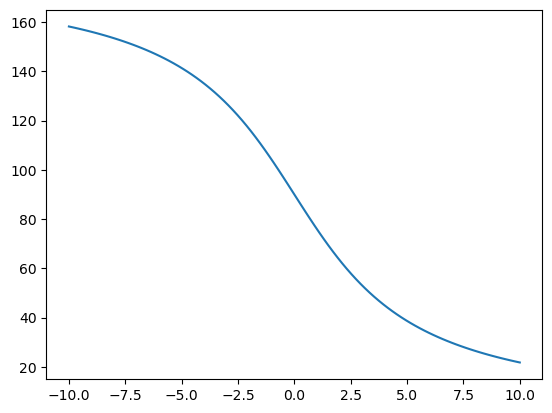

In [36]:
import matplotlib.pyplot as plt
import numpy as np

np.degrees(np.arctan2(-1, -40))

x = np.linspace(-10, 10, 100)
y = np.degrees(np.arctan2(4, x))
# y = np.degrees(np.arctan2(-4, x))
# y = np.degrees(np.arcsin(x / 4))
plt.plot(x, y)